# **Enfoque Clásico de series de tiempo** #
## Andrea Carolina López Ruiz ##
**16 marzo - Sesión 12**

En el enfoque clasico de series de tiempo se considera que la serie tiene 4 componentes:<br>
    1. Tendencia <br>
    2. Ciclo<br>
    3. Estacional<br>
    4. Irregular, usualmente se considera que la tendencia  y el ciclo vienen juntos poe lo que se habla de la tendecia-ciclo  (tendencia)

In [4]:
# Importamos librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Modelo ETS error_trend_seasonally (tendenciaciclo-estacional-irregular)
from statsmodels.tsa.api import seasonal_decompose

In [9]:
## datos
pasajeros_avion=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv', index_col='Month', parse_dates=True)

In [10]:
pasajeros_avion

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [13]:
#cambio de nombres del data frame
pasajeros_avion=pasajeros_avion.rename(columns={'Thousands of Passengers':'Miles de pasajeros'})

In [15]:
pasajeros_avion.head()

,Miles de pasajeros
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
pasajeros_avion.index.freq='MS'

Text(0.5, 0, 'Año-Mes')

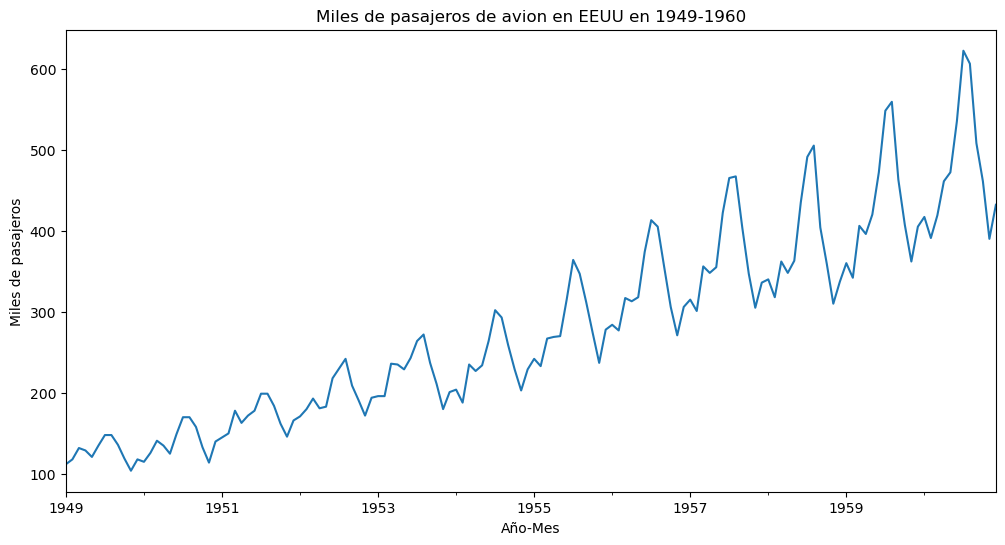

In [28]:
pasajeros_avion['Miles de pasajeros'].plot(figsize=(12,6))
plt.title('Miles de pasajeros de avion en EEUU en 1949-1960')
plt.ylabel('Miles de pasajeros')
plt.xlabel('Año-Mes')

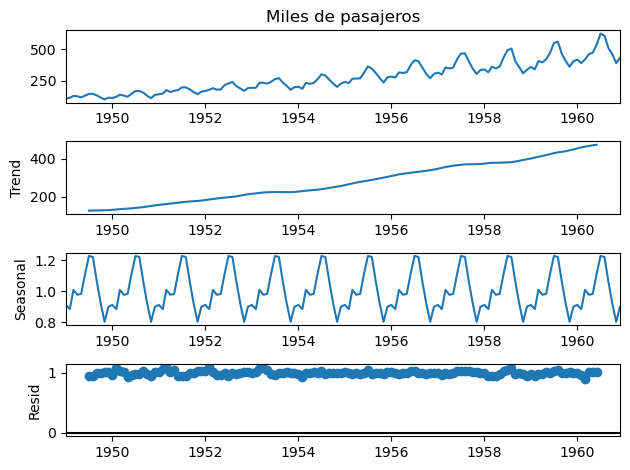

In [51]:
series1 = seasonal_decompose(pasajeros_avion['Miles de pasajeros'], model='multiplicative')
## aditivo -> adi
## ultiplicativa -> multiplicative
series1.plot()
plt.show()

In [48]:
series1.seasonal.head(12)
#Los meses negativos son en los que el número de vuelos cae

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
1949-06-01    1.112776
1949-07-01    1.226556
1949-08-01    1.219911
1949-09-01    1.060492
1949-10-01    0.921757
1949-11-01    0.801178
1949-12-01    0.898824
Freq: MS, Name: seasonal, dtype: float64

In [49]:
#Desestacionalizar= significa sin el componente estacionario
#vamos a quitar el componente estacional
pasajeros_avion['desestacionalizada']=pasajeros_avion['Miles de pasajeros']/series1.seasonal

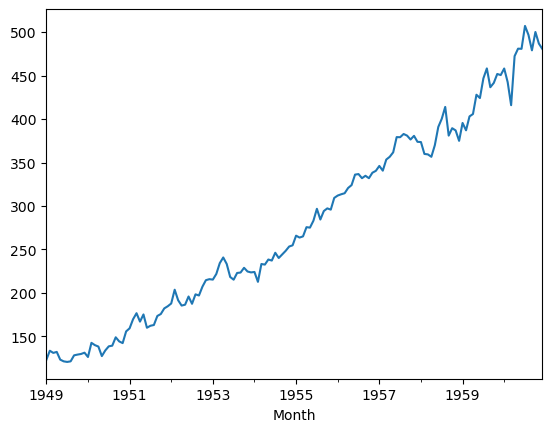

In [50]:
pasajeros_avion['desestacionalizada'].plot();

In [53]:
confirmados_mex=pd.read_excel('covid_estados.xlsx')

In [54]:
confirmados_mex.head()

,fecha,aguascalientes,baja california,baja california sur,campeche,chiapas,chihuahua,distrito federal,coahuila,colima,...,san luis potosi,sinaloa,sonora,tabasco,tamaulipas,tlaxcala,veracruz,yucatan,zacatecas,nacional
0,2020-02-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-27,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,4
2,2020-02-28,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,2020-02-29,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [56]:
confirmados_mex['fecha']=pd.to_datetime(confirmados_mex['fecha'])
confirmados_mex

,fecha,aguascalientes,baja california,baja california sur,campeche,chiapas,chihuahua,distrito federal,coahuila,colima,...,san luis potosi,sinaloa,sonora,tabasco,tamaulipas,tlaxcala,veracruz,yucatan,zacatecas,nacional
0,2020-02-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-27,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,4
2,2020-02-28,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,2020-02-29,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,2023-03-11,4,8,14,1,1,3,367,22,11,...,8,17,12,2,5,8,22,1,8,878
1110,2023-03-12,2,4,5,0,0,3,259,26,16,...,6,10,15,1,8,5,25,2,4,729
1111,2023-03-13,24,99,72,3,1,40,1145,64,43,...,81,45,64,4,60,42,88,12,20,3450
1112,2023-03-14,4,35,36,1,0,13,459,32,16,...,33,12,20,0,17,18,33,7,7,1339


In [57]:
pd.to_datetime(confirmados_mex['fecha'])

0      2020-02-26
1      2020-02-27
2      2020-02-28
3      2020-02-29
4      2020-03-01
          ...    
1109   2023-03-11
1110   2023-03-12
1111   2023-03-13
1112   2023-03-14
1113   2023-03-15
Name: fecha, Length: 1114, dtype: datetime64[ns]

In [59]:
confirmados_mex = confirmados_mex.set_index('fecha')

In [60]:
confirmados_mex.index

DatetimeIndex(['2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06',
               ...
               '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09',
               '2023-03-10', '2023-03-11', '2023-03-12', '2023-03-13',
               '2023-03-14', '2023-03-15'],
              dtype='datetime64[ns]', name='fecha', length=1114, freq=None)

In [61]:
%whos

Variable             Type               Data/Info
-------------------------------------------------
confirmados_mex      DataFrame                      aguascaliente<...>n[1114 rows x 33 columns]
np                   module             <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pasajeros_avion      DataFrame                      Miles de pasa<...>n\n[144 rows x 2 columns]
pd                   module             <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt                  module             <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
seasonal_decompose   function           <function seasonal_decomp<...>se at 0x000002CE580B18B0>
serie1               DecomposeResult    <statsmodels.tsa.seasonal<...>ct at 0x000002CE5AE25B20>
series1              DecomposeResult    <statsmodels.tsa.seasonal<...>ct at 0x000002CE5AED0E20>


In [62]:
confirmados_mex.index.freq='D'

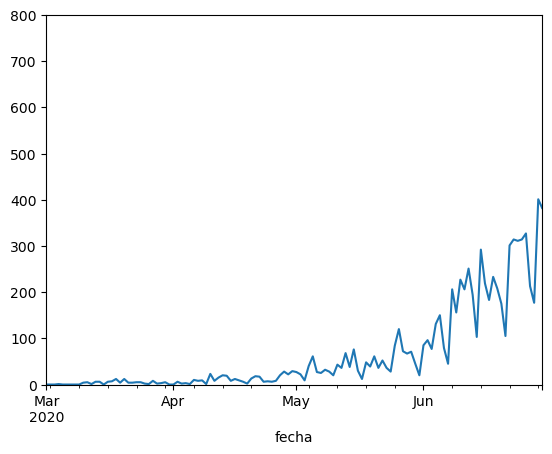

In [66]:
confirmados_mex['nuevo leon'].plot();
plt.xlim('2020-03-01','2020-06-30');
plt.ylim(0,800);

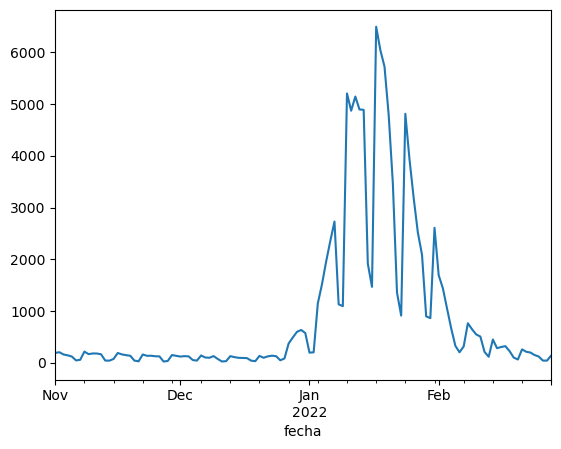

In [67]:
confirmados_mex['nuevo leon'].plot();
plt.xlim('2021-11-01','2022-02-28');

In [69]:
serie2=seasonal_decompose(confirmados_mex['nuevo leon'])
#por default hace el modelo aditivo

<AxesSubplot:xlabel='fecha'>

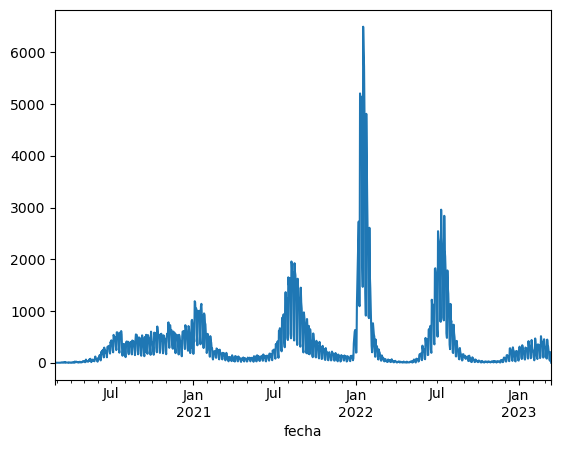

In [70]:
confirmados_mex['nuevo leon'].plot()